2021-06-29 <br/>
Animal Rescues <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-06-29/readme.md

Choropleth map (UK) - Completed <br/>


https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
%matplotlib inline
pd.set_option("display.max_columns", None)

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-29/animal_rescues.csv")

In [5]:
df.head()

,incident_number,date_time_of_call,cal_year,fin_year,type_of_incident,pump_count,pump_hours_total,hourly_notional_cost,incident_notional_cost,final_description,animal_group_parent,originof_call,property_type,property_category,special_service_type_category,special_service_type,ward_code,ward,borough_code,borough,stn_ground_name,uprn,street,usrn,postcode_district,easting_m,northing_m,easting_rounded,northing_rounded,latitude,longitude
0,139091.0,01/01/2009 03:01,2009,2008/09,Special Service,1.0,2.0,255,510.0,Redacted,Dog,Person (land line),House - single occupancy,Dwelling,Other animal assistance,Animal assistance involving livestock - Other ...,E05011467,Crystal Palace & Upper Norwood,E09000008,Croydon,Norbury,NaN,Waddington Way,20500146.0,SE19,NaN,NaN,532350,170050,NaN,NaN
1,275091.0,01/01/2009 08:51,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,Fox,Person (land line),Railings,Outdoor Structure,Other animal assistance,Animal assistance involving livestock - Other ...,E05000169,Woodside,E09000008,Croydon,Woodside,NaN,Grasmere Road,NaN,SE25,534785.0,167546.0,534750,167550,51.390954,-0.064167
2,2075091.0,04/01/2009 10:07,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,Dog,Person (mobile),Pipe or drain,Outdoor Structure,Animal rescue from below ground,Animal rescue from below ground - Domestic pet,E05000558,Carshalton Central,E09000029,Sutton,Wallington,NaN,Mill Lane,NaN,SM5,528041.0,164923.0,528050,164950,51.368941,-0.161985
3,2872091.0,05/01/2009 12:27,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,Horse,Person (mobile),"Intensive Farming Sheds (chickens, pigs etc)",Non Residential,Animal rescue from water,Animal rescue from water - Farm animal,E05000330,Harefield,E09000017,Hillingdon,Ruislip,1.000210e+11,Park Lane,21401484.0,UB9,504689.0,190685.0,504650,190650,51.605283,-0.489684
4,3553091.0,06/01/2009 15:23,2009,2008/09,Special Service,1.0,1.0,255,255.0,Redacted,Rabbit,Person (mobile),House - single occupancy,Dwelling,Other animal assistance,Animal assistance involving livestock - Other ...,E05000310,Gooshays,E09000016,Havering,Harold Hill,NaN,Swindon Lane,21300122.0,RM3,NaN,NaN,554650,192350,NaN,NaN


<AxesSubplot:xlabel='cal_year'>

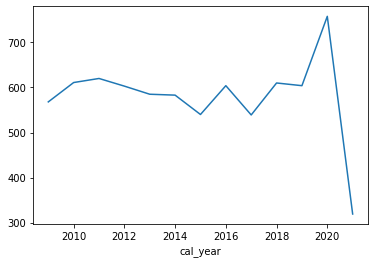

In [7]:
df.groupby(['cal_year'])['cal_year'].count().plot(kind='line')

<AxesSubplot:xlabel='type_of_incident'>

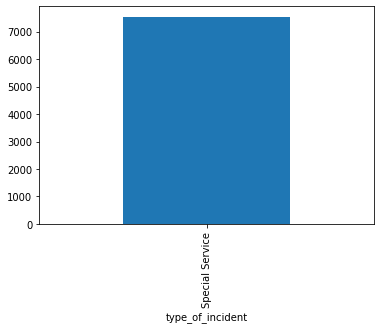

In [8]:
df.groupby(['type_of_incident'])['type_of_incident'].count().plot(kind='bar')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7544 entries, 0 to 7543
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   incident_number                4066 non-null   float64
 1   date_time_of_call              7544 non-null   object 
 2   cal_year                       7544 non-null   int64  
 3   fin_year                       7544 non-null   object 
 4   type_of_incident               7544 non-null   object 
 5   pump_count                     7494 non-null   float64
 6   pump_hours_total               7493 non-null   float64
 7   hourly_notional_cost           7544 non-null   int64  
 8   incident_notional_cost         7493 non-null   float64
 9   final_description              7539 non-null   object 
 10  animal_group_parent            7544 non-null   object 
 11  originof_call                  7544 non-null   object 
 12  property_type                  7544 non-null   o

<AxesSubplot:xlabel='animal_group_parent'>

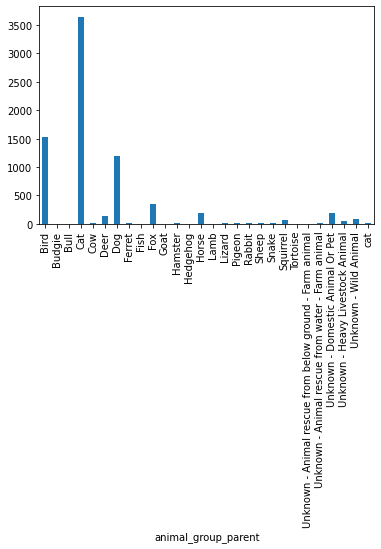

In [12]:
df.groupby(['animal_group_parent'])['animal_group_parent'].count().plot(kind='bar')

<AxesSubplot:xlabel='originof_call'>

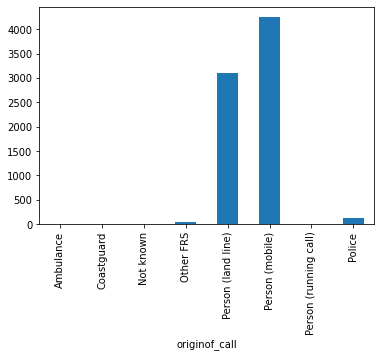

In [13]:
df.groupby(['originof_call'])['originof_call'].count().plot(kind='bar')

<AxesSubplot:xlabel='property_category'>

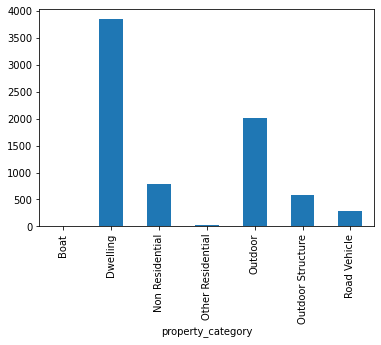

In [14]:
df.groupby(['property_category'])['property_category'].count().plot(kind='bar')

<AxesSubplot:xlabel='special_service_type_category'>

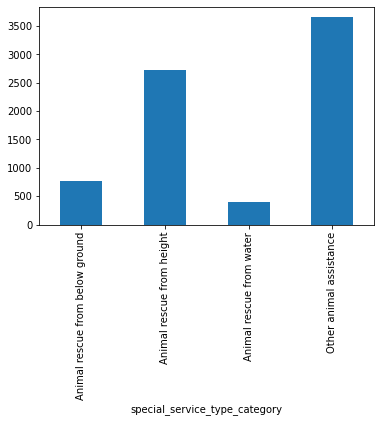

In [16]:
df.groupby(['special_service_type_category'])['special_service_type_category'].count().plot(kind='bar')

In [56]:
import geopandas as gpd
fp = 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


<AxesSubplot:>

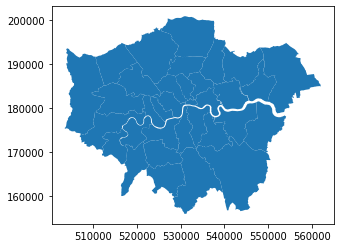

In [28]:
map_df.plot()

In [29]:
df.columns

Index(['incident_number', 'date_time_of_call', 'cal_year', 'fin_year',
       'type_of_incident', 'pump_count', 'pump_hours_total',
       'hourly_notional_cost', 'incident_notional_cost', 'final_description',
       'animal_group_parent', 'originof_call', 'property_type',
       'property_category', 'special_service_type_category',
       'special_service_type', 'ward_code', 'ward', 'borough_code', 'borough',
       'stn_ground_name', 'uprn', 'street', 'usrn', 'postcode_district',
       'easting_m', 'northing_m', 'easting_rounded', 'northing_rounded',
       'latitude', 'longitude'],
      dtype='object')

In [59]:
map_df.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')

In [116]:
data_for_map=df[['cal_year','type_of_incident','borough','special_service_type_category','type_of_incident']]

In [120]:
a3=data_for_map[data_for_map.cal_year==2009].groupby('borough').count()

In [121]:
merged = pd.merge(map_df,a3,left_on='NAME' ,right_on='borough')
merged.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,cal_year,type_of_incident,special_service_type_category,type_of_incident
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",14,14,14,14
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",36,36,36,36
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",21,21,21,21
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",16,16,16,16
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",11,11,11,11


In [127]:
import matplotlib.pyplot as plt

def map_plotting (data,variable,title):
    # set a variable that will call whatever column we want to visualise on the map
    variable = 'cal_year'
    # set the range for the choropleth
    vmin, vmax = 120, 220
    # create figure and axes for Matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.axis('off')

    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'})
    # create an annotation for the data source
    #ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    # empty array for the data range
    sm._A = []
    # add the colorbar to the figure
    cbar = fig.colorbar(sm)


    # create map
    data.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

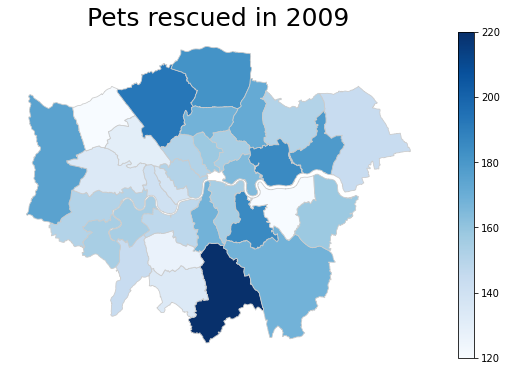

In [128]:
map_plotting(data=merged,variable='cal_year',title='Pets rescued in 2009')

In [ ]:
map_plotting(special_service_type='special_service_type',title='Pets rescued in 2009')

In [133]:
data_for_map.special_service_type_category.value_counts()

Other animal assistance            3653
Animal rescue from height          2721
Animal rescue from below ground     770
Animal rescue from water            400
Name: special_service_type_category, dtype: int64

In [134]:
a4=data_for_map[data_for_map.special_service_type_category=='Animal rescue from height'].groupby('borough').count()

In [135]:
merged1 = pd.merge(map_df,a4,left_on='NAME' ,right_on='borough')
merged1.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,cal_year,type_of_incident,special_service_type_category,type_of_incident
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",30,30,30,30
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",68,68,68,68
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",45,45,45,45
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",32,32,32,32
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",58,58,58,58


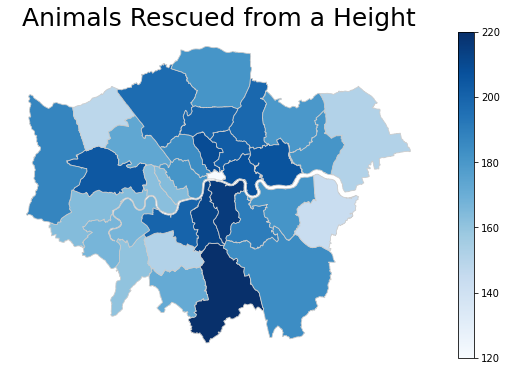

In [136]:
map_plotting(data=merged1,variable='special_service_type_category',title='Animals Rescued from a Height')